<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/DecisionTreeClassifie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

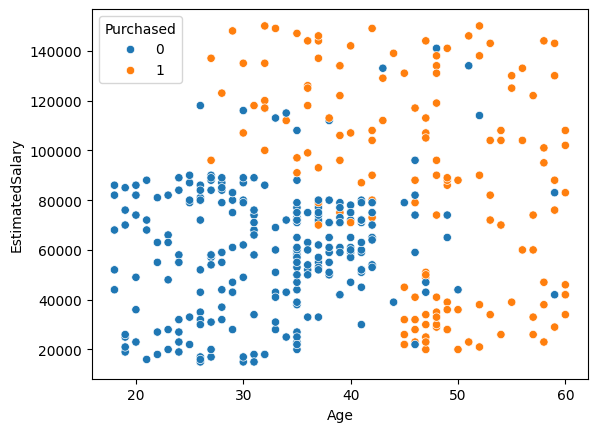

In [36]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df)
plt.show()

In [37]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

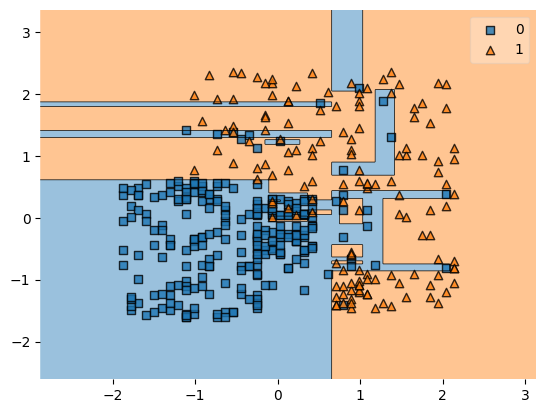

In [38]:
plot_decision_regions(x, y.to_numpy(), clf=dt)
plt.show()

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [16]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt.score(x_test,y_test)*100

83.75

In [35]:
dt.score(x_train,y_train)*100

99.6875

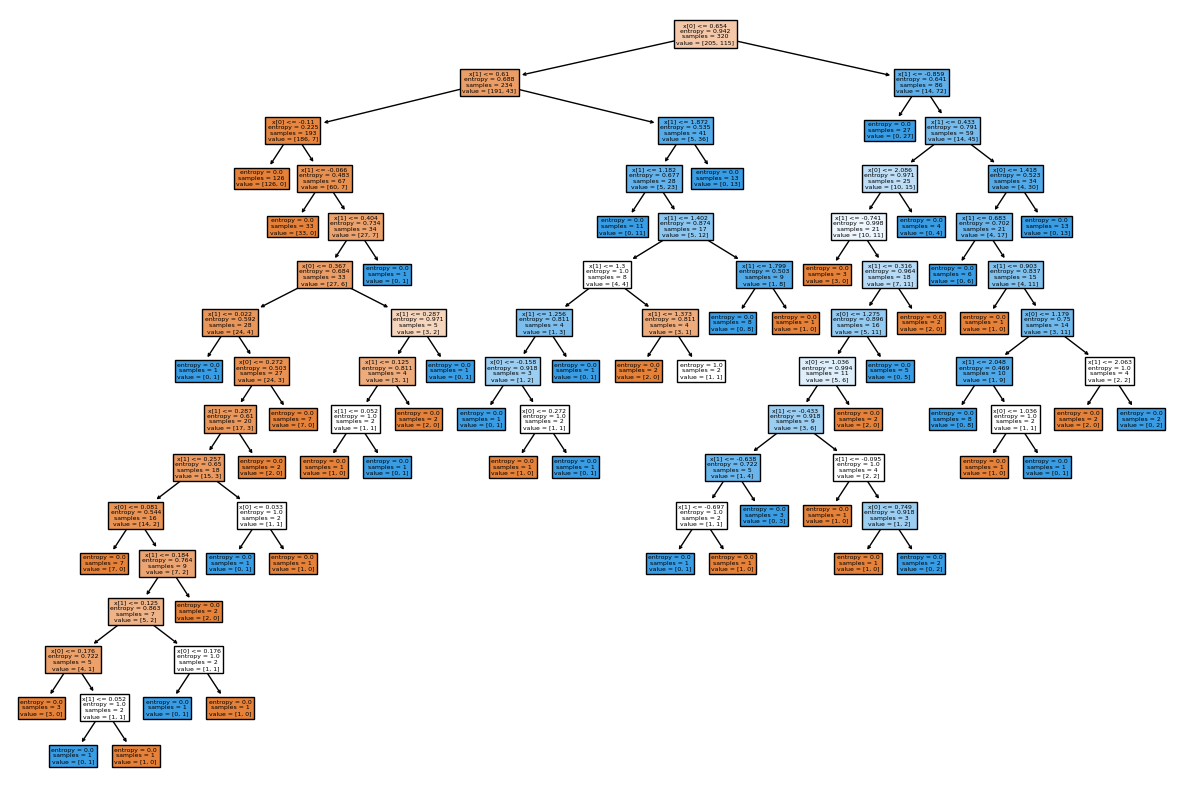

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True)
plt.show()

In [63]:
## Pre Pruning
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
dt.score(x_test,y_test)*100

91.25

In [65]:
dt.score(x_train,y_train)*100

91.875

In [67]:
## Post Pruning
for i in range(1,10):
  dt2=DecisionTreeClassifier(max_depth=i)
  dt2.fit(x_train,y_train)
  print(dt2.score(x_train,y_train),',',dt2.score(x_test,y_test),',',i)

0.821875 , 0.9 , 1
0.91875 , 0.9125 , 2
0.91875 , 0.9125 , 3
0.93125 , 0.9125 , 4
0.934375 , 0.9 , 5
0.95 , 0.8625 , 6
0.96875 , 0.85 , 7
0.975 , 0.85 , 8
0.98125 , 0.85 , 9


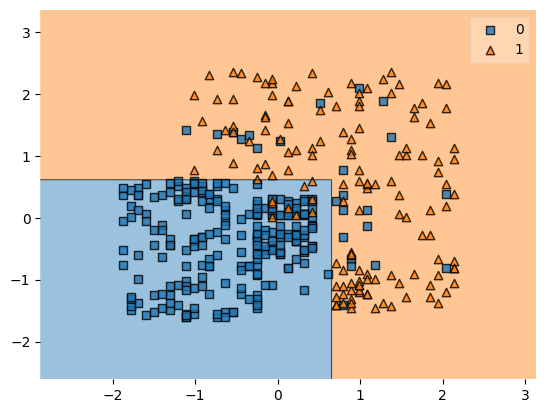

In [66]:
plot_decision_regions(x, y.to_numpy(), clf=dt)
plt.show()